### Questions to answer

*   What is the percentage of no-show?
*   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    *   Is the time gender related to whether a patient will show or not?
    *   Are patients with scholarship more likely to miss their appointment?
    *   Are patients who don't recieve sms more likely to miss their appointment?
    *   Is the time difference between the scheduling and appointment related to whether a patient will show?
    *   Does age affect whether a patient will show up or not?
    *   What is the percentage of patients missing their appointments for every neighbourhood

In [1]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline

In [2]:
## Loading the dataset and checking the columns we have

### Load your data and print out a few lines. Perform operations to inspect data
### Types and look for instances of missing or possibly errant data.
df = pd.read_csv('/content/KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [3]:
### Get the shape and types of our data
print(df.shape)
pd.DataFrame(df.dtypes)

(10785, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,float64
Hipertension,float64
Diabetes,float64


In [4]:
### Get some statistics about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.078500e+04,1.078500e+04,10785.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000
mean,1.564572e+14,5.647538e+06,37.854149,0.085126,0.195660,0.064262,0.059440,0.021142,0.322329
std,2.675289e+14,6.644964e+04,22.030057,0.279082,0.396726,0.245230,0.236457,0.155035,0.467390
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.459497e+12,5.623695e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.215621e+13,5.651462e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.532898e+13,5.694639e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999350e+14,5.754683e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [5]:
### Check if there is any missing values in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       10785 non-null  float64
 1   AppointmentID   10785 non-null  int64  
 2   Gender          10785 non-null  object 
 3   ScheduledDay    10785 non-null  object 
 4   AppointmentDay  10785 non-null  object 
 5   Age             10785 non-null  int64  
 6   Neighbourhood   10785 non-null  object 
 7   Scholarship     10784 non-null  float64
 8   Hipertension    10784 non-null  float64
 9   Diabetes        10784 non-null  float64
 10  Alcoholism      10784 non-null  float64
 11  Handcap         10784 non-null  float64
 12  SMS_received    10784 non-null  float64
 13  No-show         10784 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.2+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship        True
Hipertension       True
Diabetes           True
Alcoholism         True
Handcap            True
SMS_received       True
No-show            True
dtype: bool

In [6]:
### Check if there is any duplicated rows in our data
df.duplicated().any()

False

In [7]:
### Drop irrelevant columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [8]:
### Change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [9]:
### Change data columns to data type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [10]:
### Turn no_show column to show
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes' nan]
[ 1.  0. nan]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [11]:
### Create a new column for days difference between scheduling and appointment
day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days 
df.insert(3,'day_diff',day_diff)
df.day_diff.dtype

dtype('int64')

In [12]:
### Check data one last time
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                   float64
hipertension                  float64
diabetes                      float64
alcoholism                    float64
handcap                       float64
sms_received                  float64
show                          float64
dtype: object

In [30]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',
                                    edgecolor='black',
                                    figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
#     plt.legend()

In [31]:
#get some statistics about our data
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,10785.000000,10785.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000
mean,8.839499,37.854149,0.085126,0.195660,0.064262,0.059440,0.021142,0.322329,0.796365
std,13.592513,22.030057,0.279082,0.396726,0.245230,0.236457,0.155035,0.467390,0.402719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,10.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,176.000000,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


percentage of patients who didn't show up for their appointment is 20.363501483679524 %


,show
show,
0.0,2196
1.0,8588


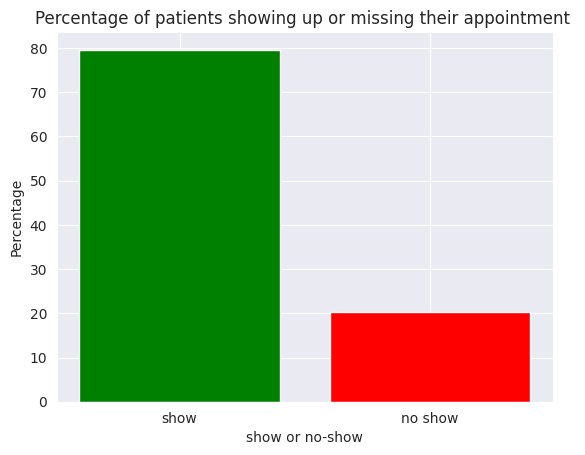

In [32]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

In [34]:
#create filters for show and no-show
show=(df.show == 1)
no_show=(df.show == 0)
total_miss=len(df[no_show])
total=len(df)

percentage of Females and Males who missed their appointment:


,gender
F,12.452480
M,7.909133


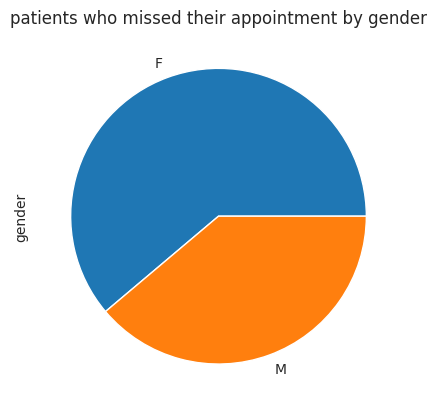

In [36]:
#get the number of patients missing their appointments by gender
no_show_gender=df[no_show]['gender'].value_counts()
no_show_gender.plot(kind='pie');
plt.title('patients who missed their appointment by gender');
print('percentage of Females and Males who missed their appointment:')
#get the percentage of patients missing their appointments by gender
pd.DataFrame(no_show_gender*100/total)

Text(0, 0.5, 'number of patients')

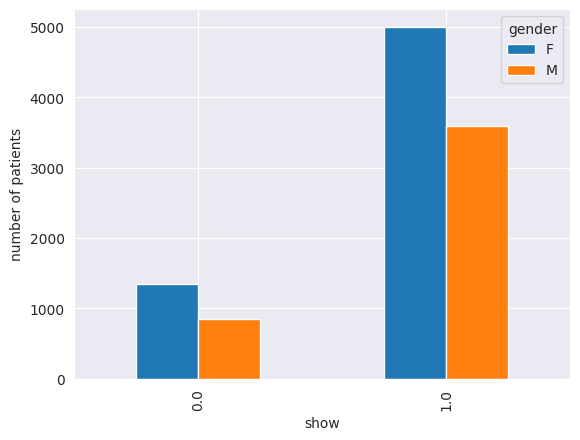

In [37]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

,show
scholarship,
0.0,0.800122
1.0,0.755991


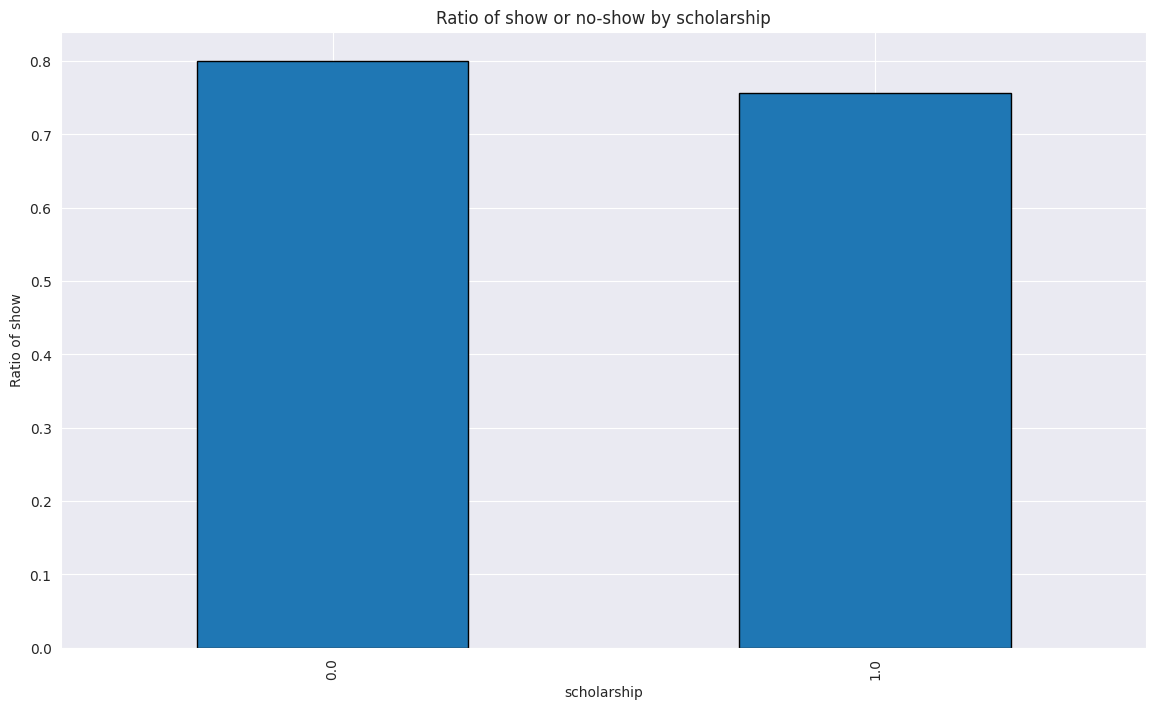

In [38]:
#what is the percentage of patients missing their appointment by scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship');
# df.groupby('scholarship')[['show']].mean()

,show
hipertension,
0.0,0.792137
1.0,0.813744


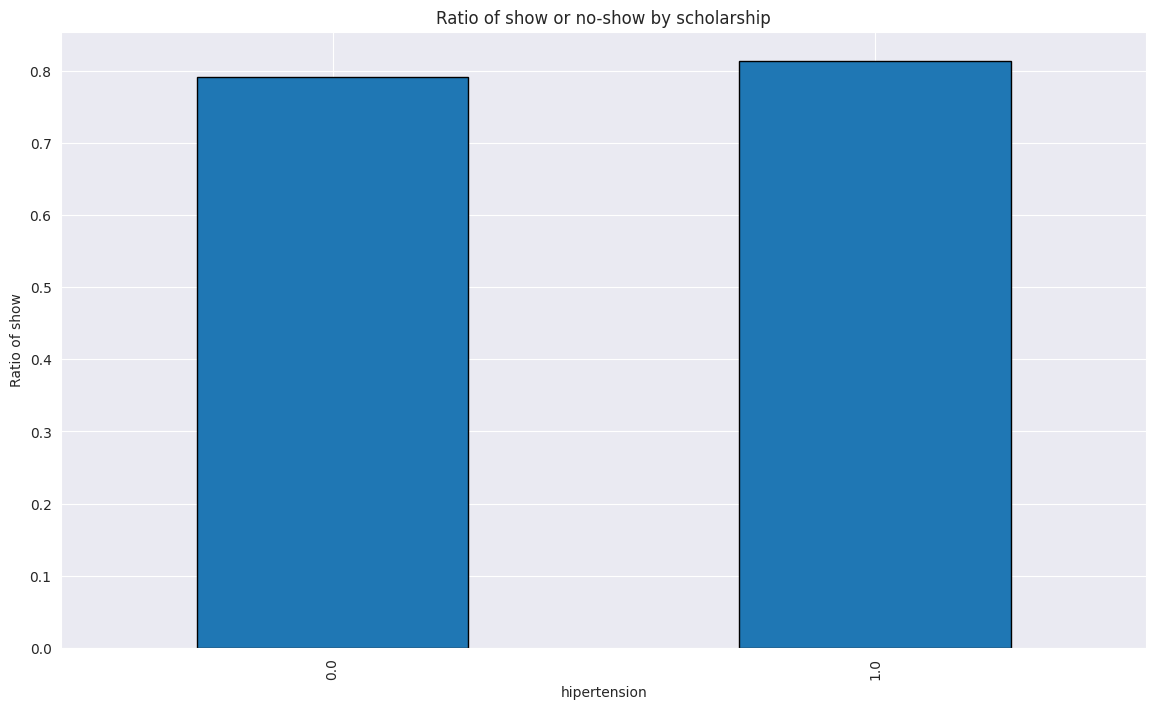

In [41]:
#what is the percentage of patients missing their appointment by hypertension
plot_rat(df.hipertension 	)
plt.title('Ratio of show or no-show by scholarship');

,show
sms_received,
0.0,0.830460
1.0,0.724684


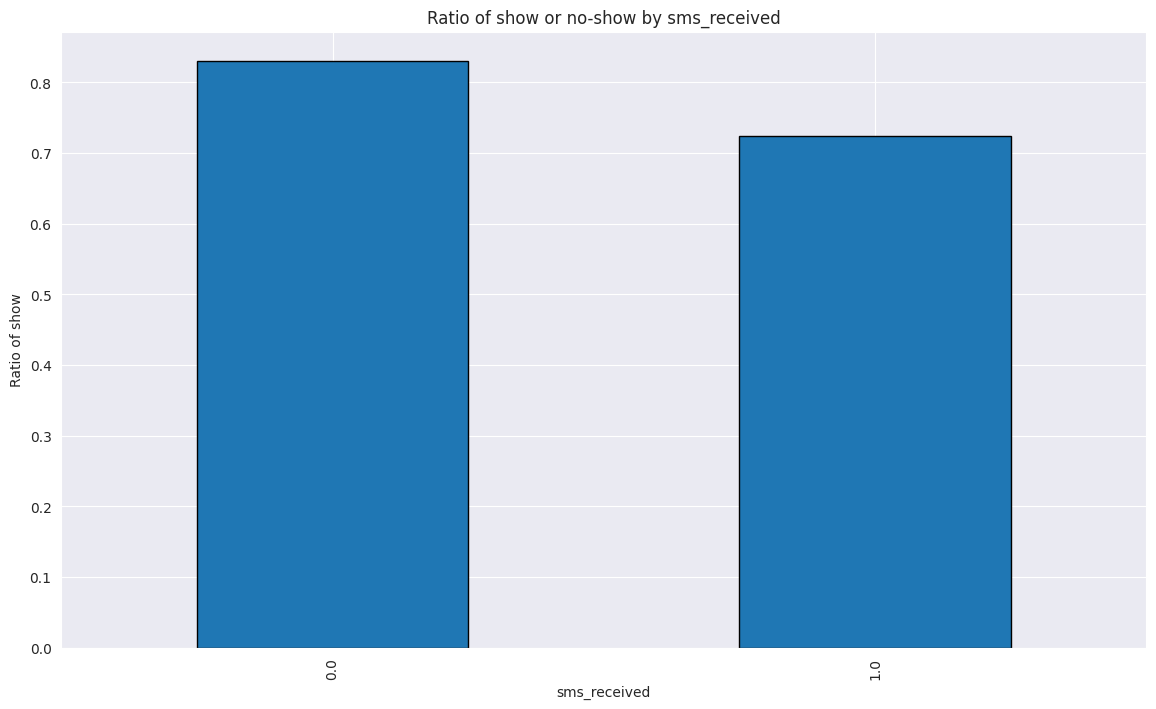

In [42]:
#what is the percentage of patient who attended their appointment by sms_received
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received');

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
fewdays,34.562842
more_than_4,29.963570
more_than_15,29.007286
sameday,6.466302


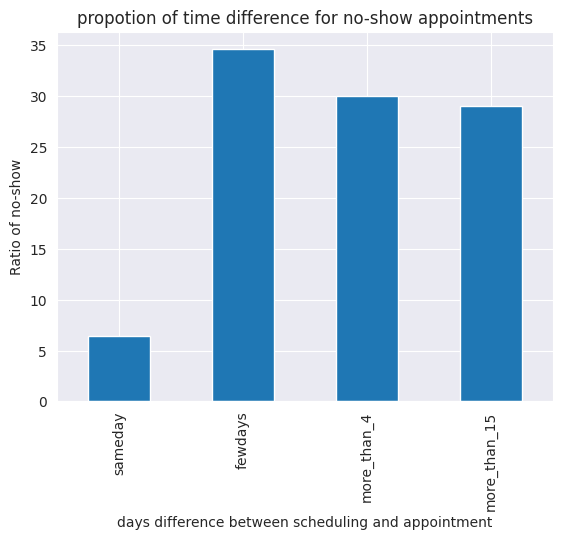

In [44]:
#filter for positive day difference
df1=df[df.day_diff>=0]
# df1.day_diff.unique()
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)
#filter for no-show records and count values for each category of day_diff2

no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('propotion of time difference for no-show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no-show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

,age
count,2196.000000
mean,34.873862
std,20.904796
min,0.000000
25%,18.000000
50%,34.000000
75%,51.000000
max,98.000000


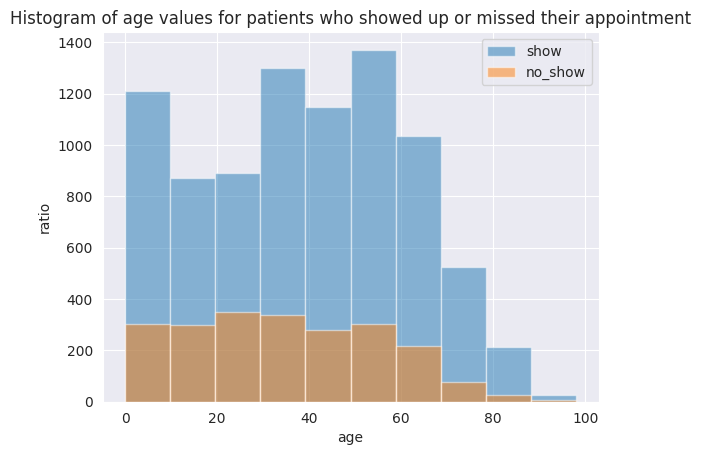

In [48]:
#plot the histograns of age for patients who showed up and who didn't
df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no_show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
#ger the mean age for patients who showed up and who didn't
df[no_show][['age']].describe()

In [52]:
#get the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,neighbourhood
ANTÔNIO HONÓRIO,0.555556
MORADA DE CAMBURI,0.500000
SANTOS DUMONT,0.379888
GURIGICA,0.324324
PRAIA DO SUÁ,0.300000
...,...
MÁRIO CYPRESTE,0.062500
ILHA DO FRADE,NaN
JOAN,NaN
PONTAL DE CAMBURI,NaN


<a id='conclusions'></a>

## Conclusions

#### After analyzing the dataset here are some findings:

1.  Percentage of patients who didn't show up for their appointment is 20.19%.
2.  The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
3.  It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
4.  It seems that patients with scholarships are actually more likely to miss their appointment.
5.  A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
6.  There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.

#### Analysis Shortcoming & Data Limitations

*   The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
*   The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
*   The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
*   When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.